This tutorial provides an overview of the Geometry class structure.

In [1]:
from IPython.display import Image

The Geometry class is designed to map the geometrical trajectory of a target photonic structure onto a discretized dataset parameter space and to generate the refined data used by the Propagator class.

From a user’s perspective, you simply need to provide a DataUpdater() instance and the relevant constraint parameters to a specified geometry class, such as SingleEuler()

In [ ]:
# Import dataset based eme
import os
import sys
root_path = os.path.abspath("../..")
em_simulator_path = root_path
print(em_simulator_path)
sys.path.append(em_simulator_path)

import em_simulation as sim


# Import dataset
sample_dataset_path = root_path + "/sample_datasets/Si_rectangular_single_waveguide"
sample_dataset = sim.DataUpdater(sample_dataset_path, is_testmode=True)

# Example of specified geometry class
top_width = 1e-6    # 1um
input_angle = 0
effective_radius = 15e-6    #15 um
bend_angle_deg = 90 # 90 degree bend
p = 0.5     # Euler portion is 0.5
sample_euler_bend = sim.SingleEuler(sample_dataset, top_width, input_angle, effective_radius,bend_angle_deg, p) # Euler bend geometry class

In the following sections, we will explain the class implementation in detail and describe how to define your own photonic structure geometry.

First, see the class hierarchy below.

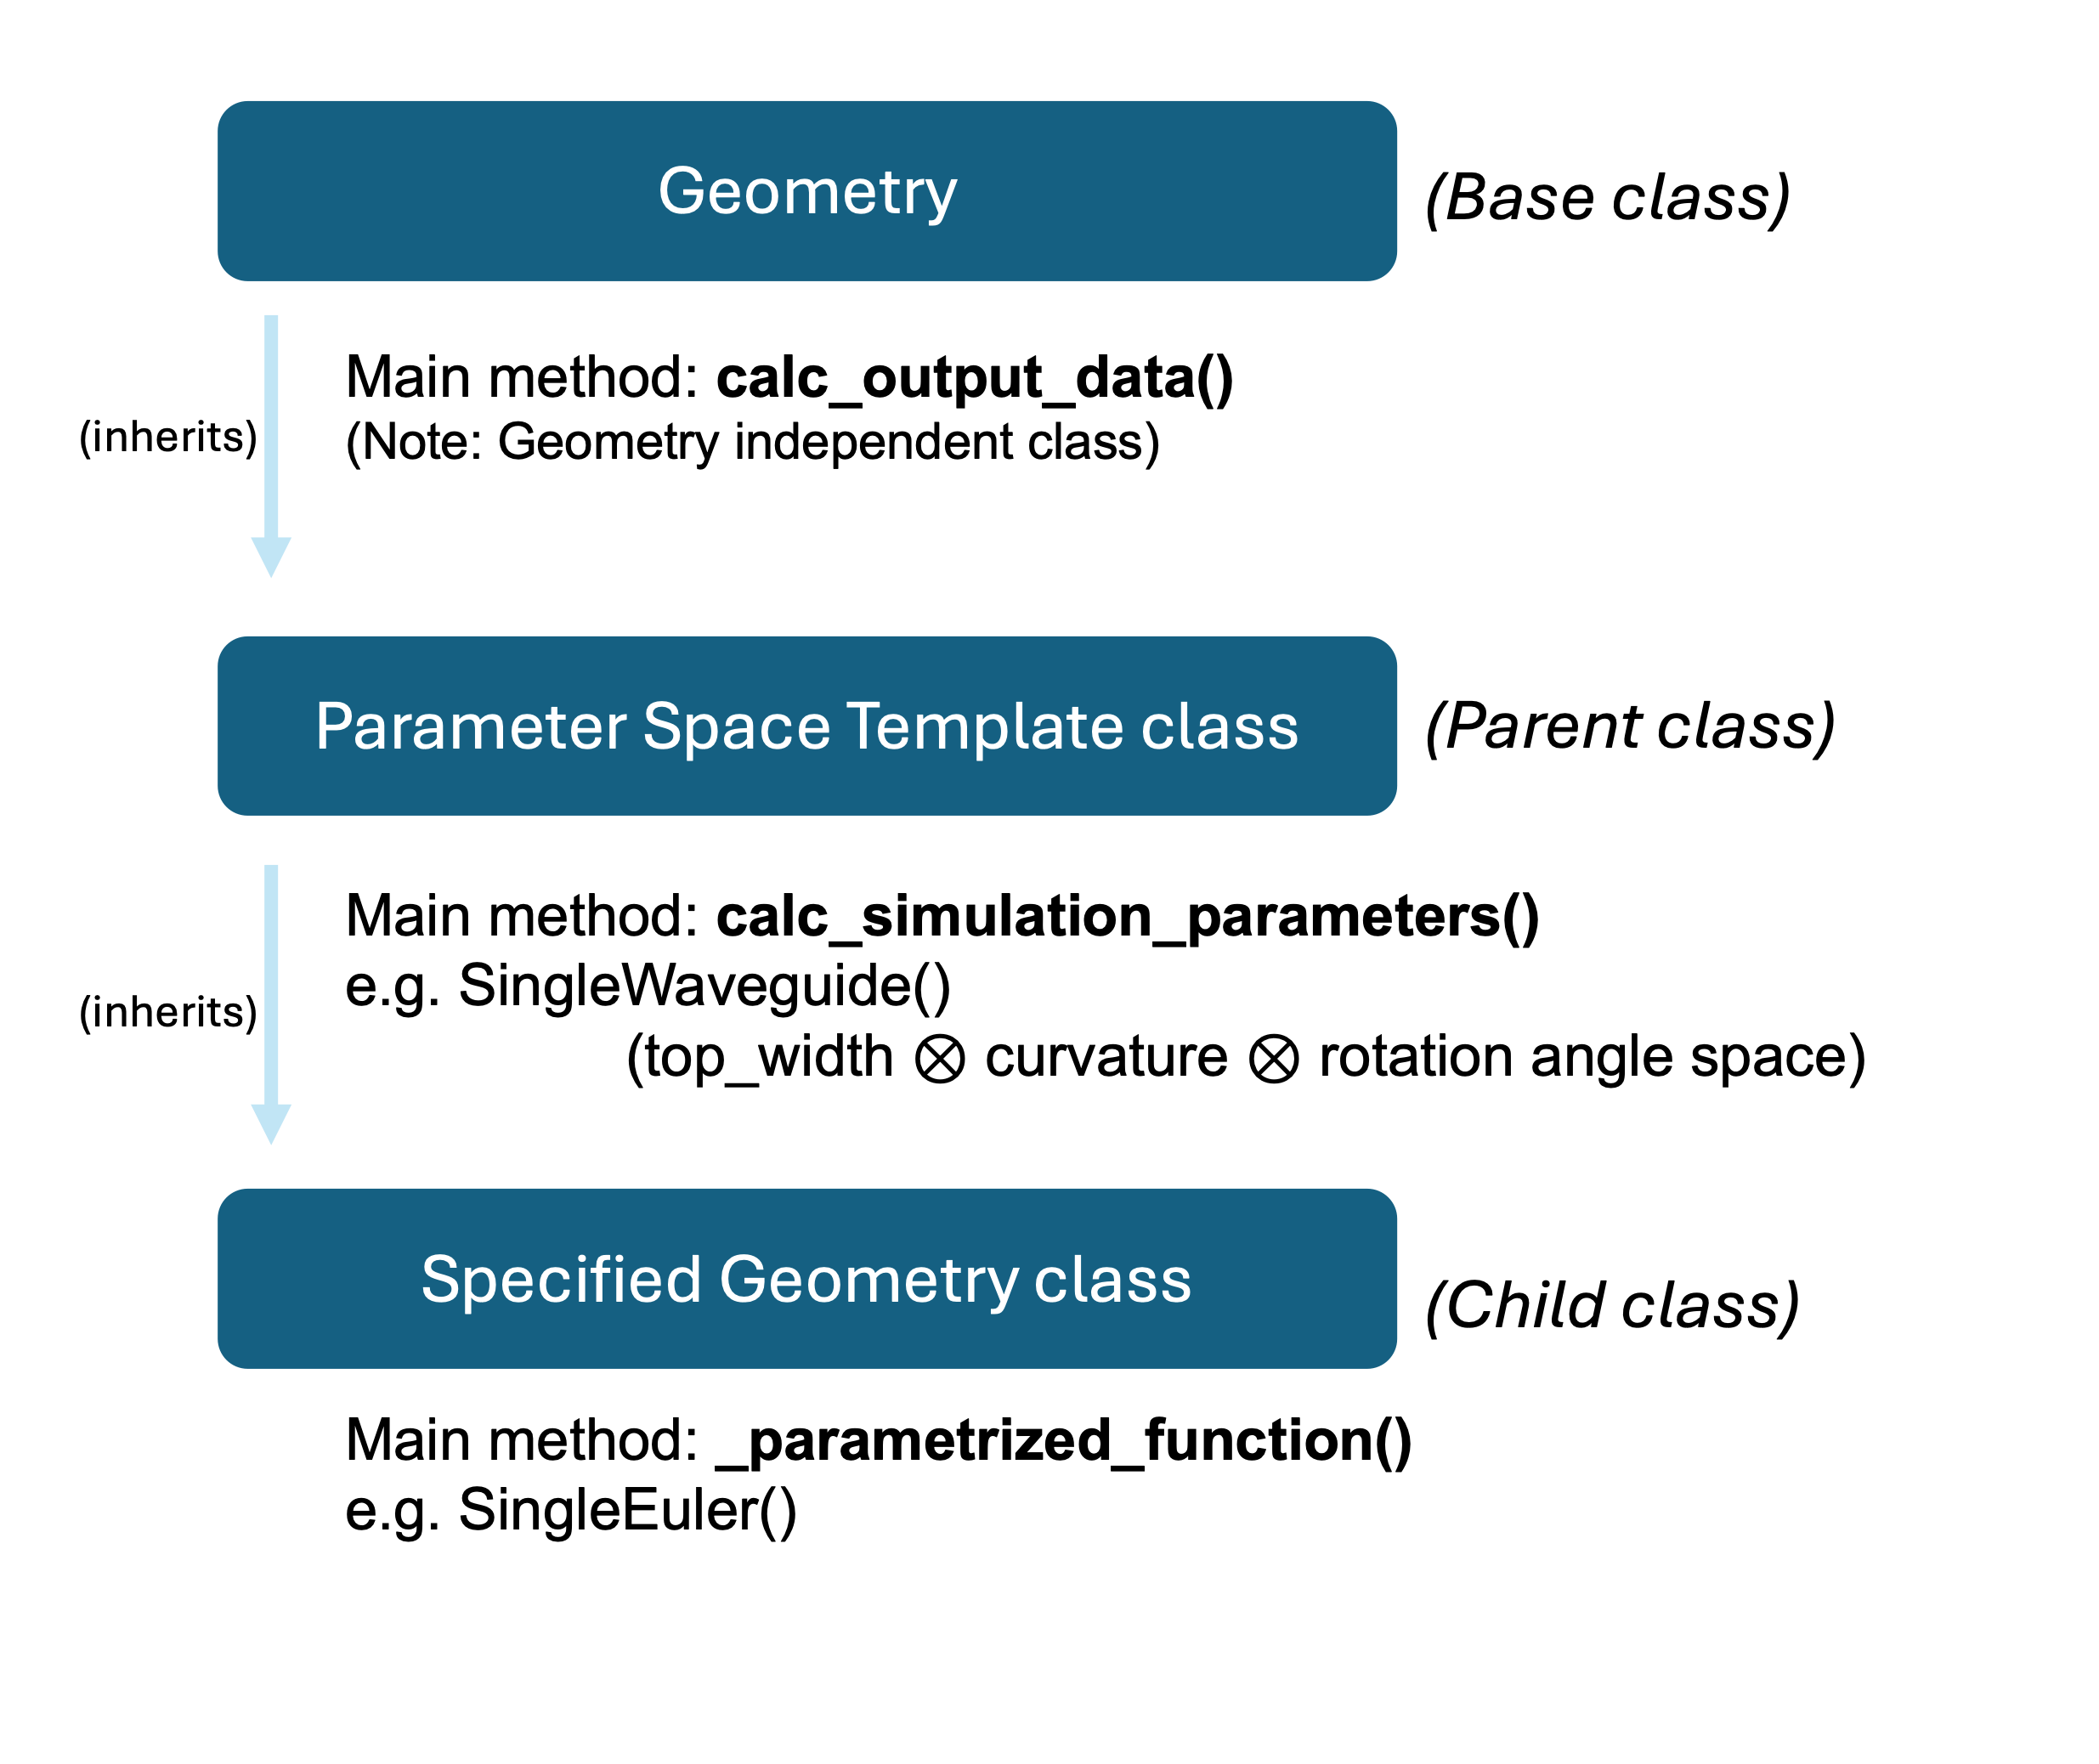

In [3]:
Image(filename="./imgs/geometry_class_structure.png", width=800)

SingleEuler() is an example of a specified geometry class, representing a partial Euler bend.

The main method of a specified geometry class is _parameterized_function(), which defines the parametric function of the photonic structure. For example, the _parameterized_function() in SingleEuler() returns the top width, curvature, and rotation angle as functions of propagation length.

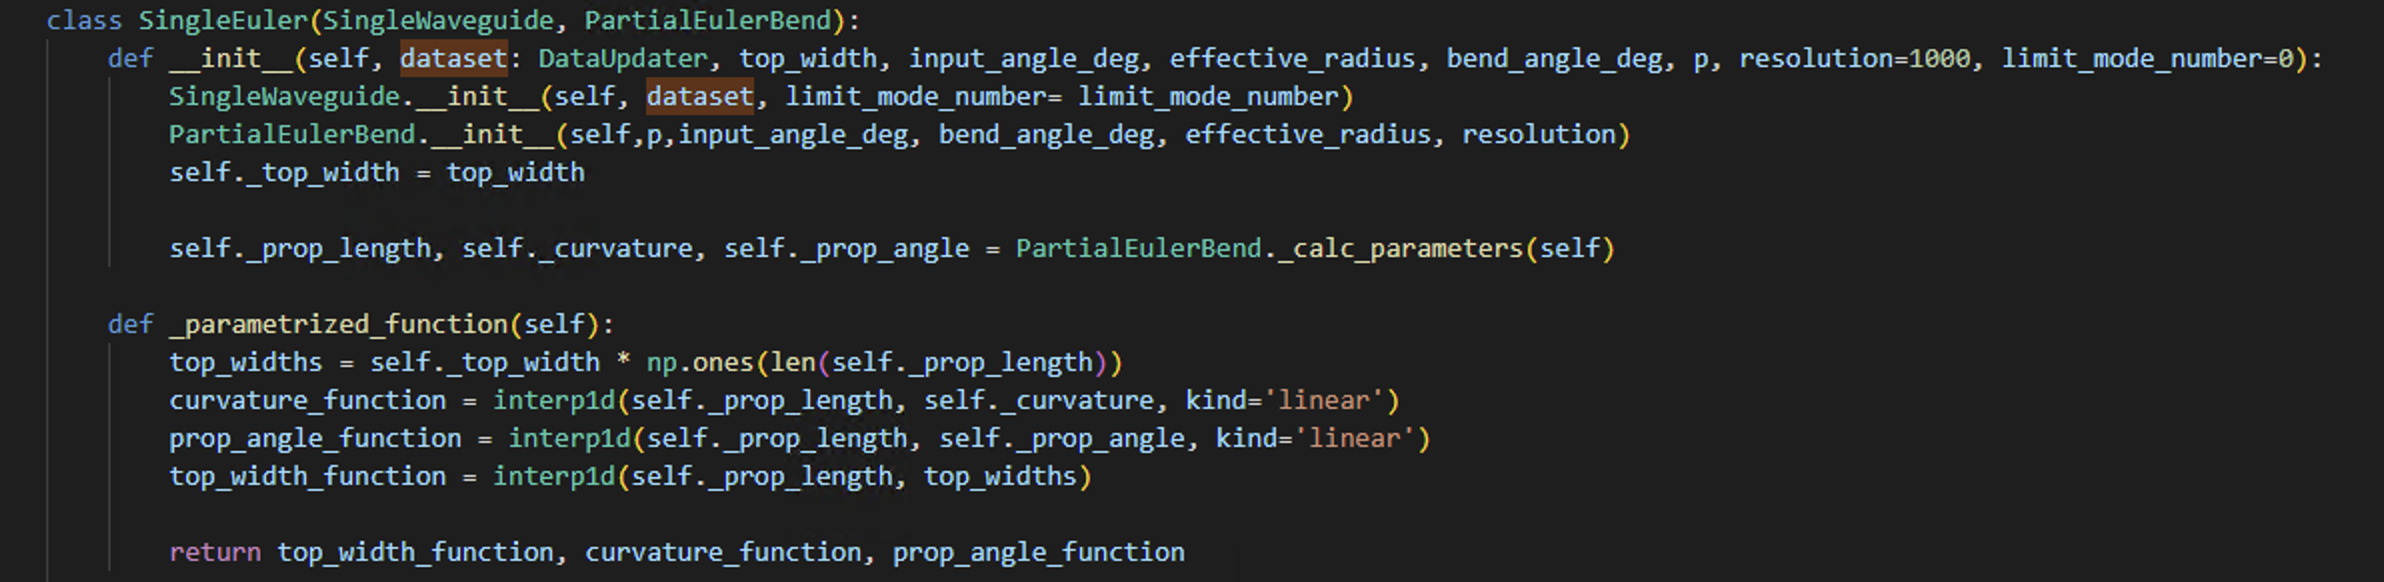

In [4]:
Image(filename="./imgs/SingleEuler_parameterized_func.png", width = 1500)

In [5]:
top_width_func, curvature_func, prop_angle_func = sample_euler_bend._parametrized_function()

These specified geometry classes inherit from a Parameter Space Template class, such as SingleWaveguide(). A Parameter Space Template class defines the template for each parameter space. For example, SingleWaveguide serves as a template for a single waveguide with varying top width, curvature, and propagation angle.

The primary method of a Parameter Space Template class is calc_simulation_parameters(), which calculates the list of parameter points for a photonic structure within the dataset parameter space. To obtain discretized parameter points, both dataset information and photonic structure information are required. The dataset parameter space (including parameter names and resolutions) is retrieved from the DataUpdater instance, while the photonic structure information is obtained from the parameter functions defined in _parameterized_function().

A Parameter Space Template class inherits from the Geometry class. The Geometry class itself is independent of parameter space type or photonic structure type—there is only one Geometry class.

The main method of the Geometry class is calc_output_data(). This method generates output data, such as overlap and effective indices along the photonic structure, using the dataset. This data will be used in the EME class. calc_output_data() obtains photonic structure parameter point information via the calc_simulation_parameters() method.

The following is the function call flow: To generate the refined data for the EME class, calc_output_data() is called. During its execution, calc_simulation_parameters() is used to obtain parameter point tuples for the photonic structure and dataset. In this process, the _parameterized_function() method is invoked to access each parameter function.

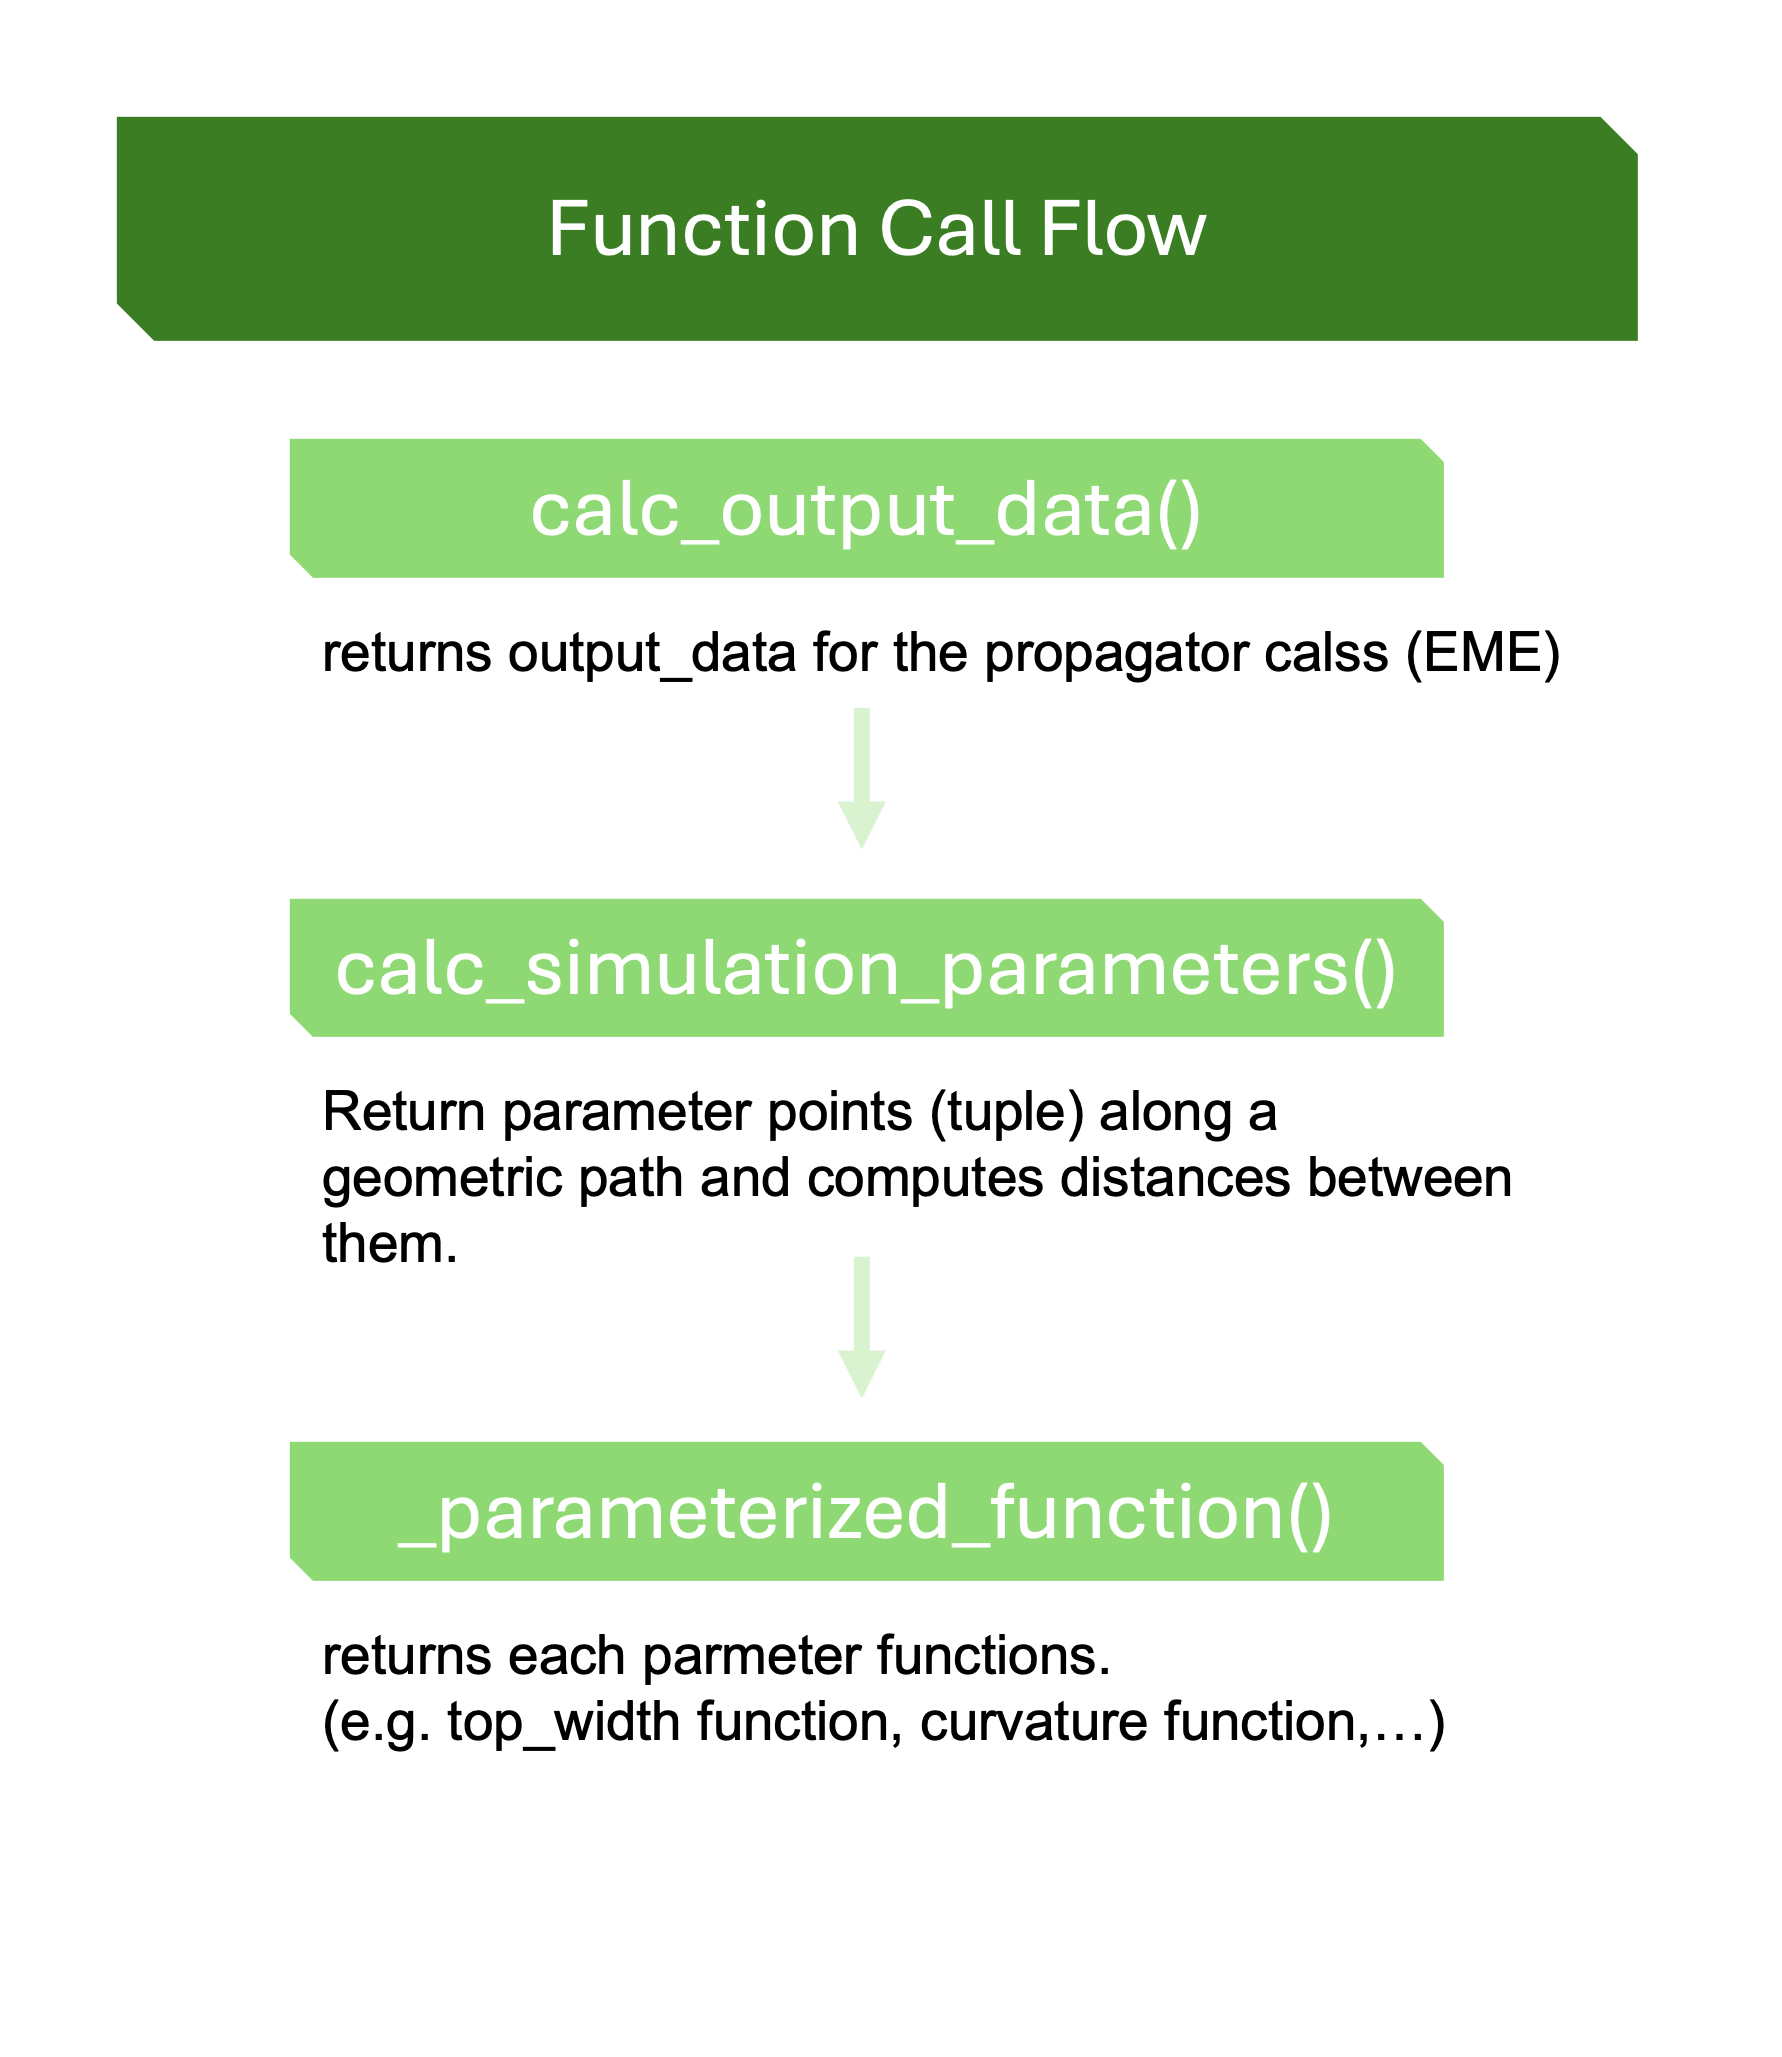

In [6]:
Image(filename="./imgs/geometry_functioncall_structure.png", width=600)

If you want to generate your own photonic structure within the parameter space of top_width, curvature, and propagation_angle, simply create your own specified geometry class that inherits from SingleWaveguide. In this class, you should implement a custom _parameterized_function() that returns the relevant parameter functions.

If you wish to generate and explore photonic structures with a new parameter space—for example, a coupled waveguide defined by parameters such as top_width1, top_width2, and gap—you will need to create a new Parameter Space Template class. This class should implement calc_simulation_parameters(), which returns parameter point tuples according to your custom parameter space. These tuples are generated based on the corresponding dataset and the parameter functions provided by your implementation of _parameterized_function().

The additional method of *Geometry* are the *plot_neffs()* and *plot_TE_polarization_fraction()*. These functions are used to check the effective indices and TE polarization fraction along the structure.

100%|██████████| 43/43 [00:00<?, ?it/s]
c:\Users\Jaesung\.conda\envs\env310\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Jaesung\.conda\envs\env310\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


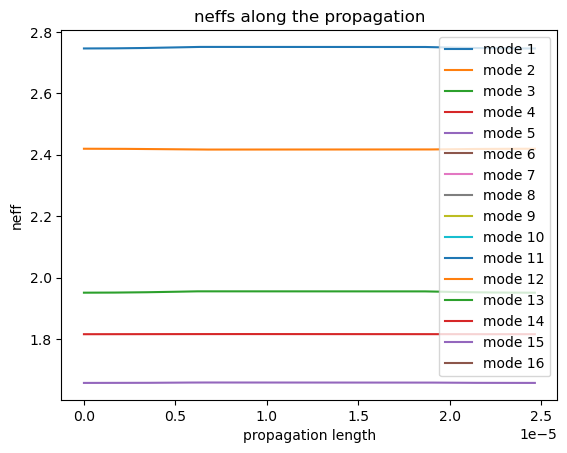

In [7]:
sample_euler_bend.plot_neffs()

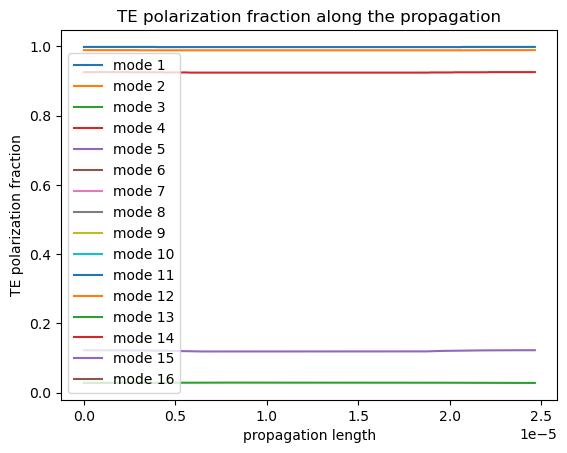

In [8]:
sample_euler_bend.plot_TE_polarization_fraction()